<a href="https://colab.research.google.com/github/primriq/ML-Apex-Univ/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering with K-Means
In this notebook, we will use the K-Means clustering algorithm to group customers based on their age and income. The goal is to discover natural segments in the data without using any labels.

We will:
1. Load the data into a pandas DataFrame
2. Visualize the raw data
3. Apply K-Means clustering on the unscaled data
4. Introduce feature scaling using MinMaxScaler
5. Re-run K-Means on the scaled data
6. Use the elbow method to choose a suitable value of k

### Importing libraries and loading the dataset
We start by importing the necessary libraries and loading the income dataset. The dataset contains two main columns we care about: `Age` and `Income($)`.

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Load the data from the GitHub repository
url = 'https://raw.githubusercontent.com/primriq/ML-Apex-Univ/refs/heads/main/Datasets/income.csv'
df = pd.read_csv(url)
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


The dataset has one row per person with the following columns:

- `Age`: age of the person in years
- `Income($)`: annual income in dollars

We will use these two columns as input features to K-Means.

### Visualizing the raw data
Before running K-Means, it is helpful to see how the data looks in the feature space.

Text(0.5, 1.0, 'Age vs Income (Raw Data)')

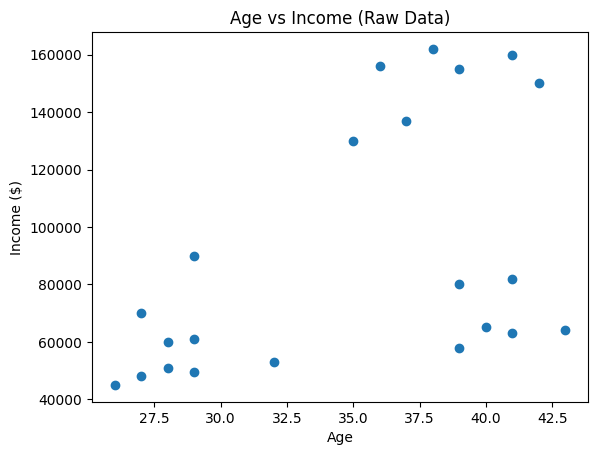

In [2]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Age vs Income (Raw Data)')

### Applying K-Means clustering on unscaled data
We first run K-Means with `n_clusters=3` directly on the original `Age` and `Income($)` values.
The `fit_predict` method both fits the model and returns the cluster index (0, 1, 2, ...) for each row.

In [3]:
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted[:10]

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

We now add a new column `cluster` to the DataFrame so that each row is labeled with the cluster index assigned by K-Means.

In [4]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


The `cluster_centers_` attribute stores the coordinates of the cluster centroids in the feature space. Each row is a centroid, and each column corresponds to a feature (Age, Income).

In [5]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

To better understand the clustering, we plot the data points colored by cluster, and overlay the cluster centers.

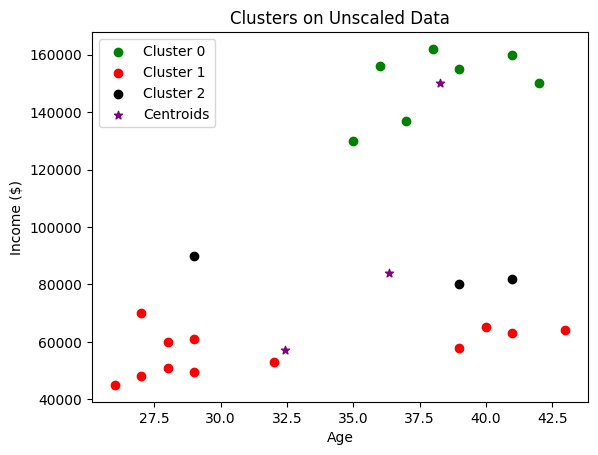

In [6]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            color='purple', marker='*', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Clusters on Unscaled Data')
plt.legend()

### Why we need feature scaling
K-Means uses distance (typically Euclidean distance) to assign points to clusters. If one feature has a much larger numeric range than another, it can dominate the distance calculation.

In this dataset, `Income($)` values are much larger than `Age`, so income may dominate the distance. To avoid this, we scale both features to the same range using `MinMaxScaler`.

### Applying Min-Max scaling
`MinMaxScaler` transforms each feature to a fixed range, usually [0, 1].
We fit the scaler on each feature and then replace the original values with their scaled versions.

In [7]:
scaler = MinMaxScaler()

# Scale Income
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# Scale Age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


After scaling, both `Age` and `Income($)` are in the range [0, 1]. Now neither feature dominates the distance computation.

### Visualizing the scaled data
We draw the scatter plot again to see how the scaled data looks. The relative positions are preserved, but the axes are now in the range [0, 1].

Text(0.5, 1.0, 'Age vs Income (Scaled Data)')

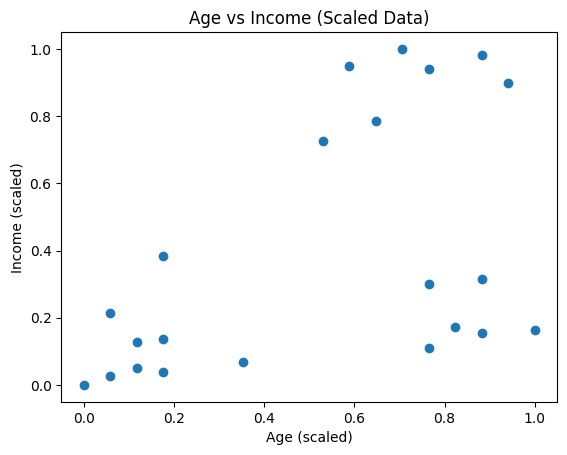

In [8]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.title('Age vs Income (Scaled Data)')

### K-Means clustering on scaled data
We now rerun K-Means with `n_clusters=3` on the scaled features. The cluster assignments and centers are likely to change compared to the unscaled case.

In [9]:
km_scaled = KMeans(n_clusters=3, random_state=42)
y_predicted_scaled = km_scaled.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted_scaled
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [10]:
km_scaled.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

We visualize the resulting clusters and their centroids on the scaled data.

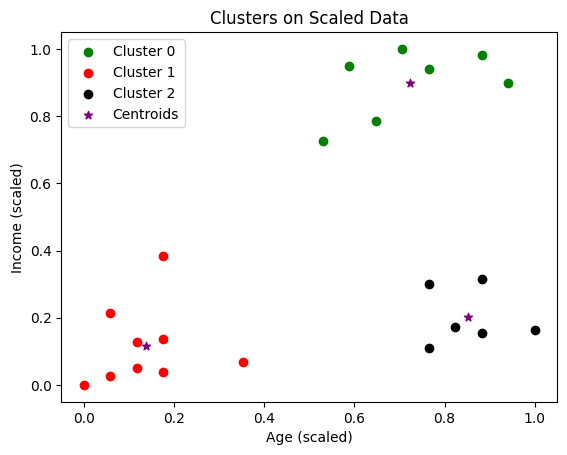

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')
plt.scatter(km_scaled.cluster_centers_[:, 0], km_scaled.cluster_centers_[:, 1],
            color='purple', marker='*', label='Centroids')
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.title('Clusters on Scaled Data')
plt.legend()

### Choosing k using the elbow method
K-Means requires us to choose the number of clusters k in advance. One common heuristic is the elbow method.

For each value of k, we run K-Means and look at the **sum of squared errors (SSE)**, also known as inertia. SSE measures how tightly the points are grouped around their cluster centers. As k increases, SSE decreases, but beyond a certain point the improvement becomes marginal. The value of k at this "elbow" is often a good choice.

Text(0.5, 1.0, 'Elbow Plot for K-Means')

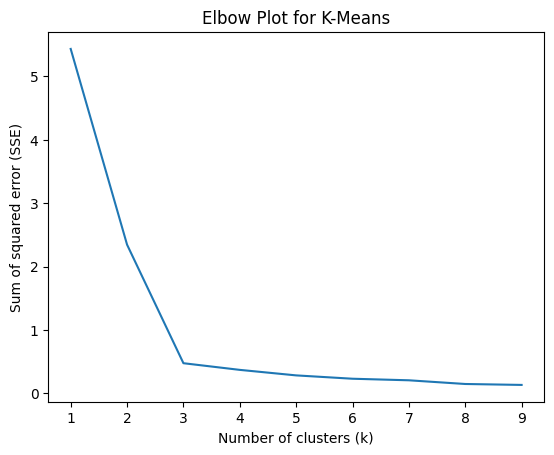

In [12]:
sse = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

plt.plot(k_range, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error (SSE)')
plt.title('Elbow Plot for K-Means')

From the elbow plot, we can visually inspect where the curve starts to flatten. That value of k is a reasonable candidate for the number of clusters in this dataset.